In [120]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [121]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [122]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [123]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [124]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [125]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [126]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement


In [127]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [128]:
# Display the row's columns and data in dictionary format

first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x26902d55308>,
 'longitude': -157.8168,
 'id': 0,
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 0.914}

In [129]:
# Display the row's columns and data in dictionary format

first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x26902d51988>,
 'date': '2010-01-01',
 'id': 0,
 'station': 'USC00519397',
 'prcp': 2.0,
 'tobs': 18.3}

# Exploratory Precipitation Analysis

In [130]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date[0]

'2017-08-23'

In [131]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query( Measurement.date).filter((Measurement.date))

In [155]:
# Calculate the date one year from the last date in data set.
one_year_ago_date = (dt.datetime.strptime(most_recent_date[0],'%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
one_year_ago_date

'2016-08-23'

In [133]:
# Perform a query to retrieve the data and precipitation scores
last_12_months_precipitation = session.query(Measurement.date, Measurement.prcp).filter((Measurement.date >= one_year_ago_date)).all()
last_12_months_precipitation

[('2016-08-23', 0.0),
 ('2016-08-24', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.3),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 3.3),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.8),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 1.3),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.8),
 ('2016-09-10', 0.0),
 ('2016-09-11', 1.3),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.5),
 ('2016-09-14', 33.5),
 ('2016-09-15', 10.7),
 ('2016-09-16', 1.5),
 ('2016-09-17', 1.3),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.5),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 1.5),
 ('2016-09-27', 0.5),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('201

In [134]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_date_df = pd.DataFrame(last_12_months_precipitation, columns=["Date", "Precipitation"])
precipitation_date_df

,Date,Precipitation
0,2016-08-23,0.0
1,2016-08-24,2.0
2,2016-08-25,2.0
3,2016-08-26,0.0
4,2016-08-27,0.0
...,...,...
2225,2017-08-19,2.3
2226,2017-08-20,NaN
2227,2017-08-21,14.2
2228,2017-08-22,12.7


In [135]:
# Sort the dataframe by date
precipitation_date_df.set_index("Date", inplace=True)
precipitation_date_df

,Precipitation
Date,
2016-08-23,0.0
2016-08-24,2.0
2016-08-25,2.0
2016-08-26,0.0
2016-08-27,0.0
...,...
2017-08-19,2.3
2017-08-20,NaN
2017-08-21,14.2


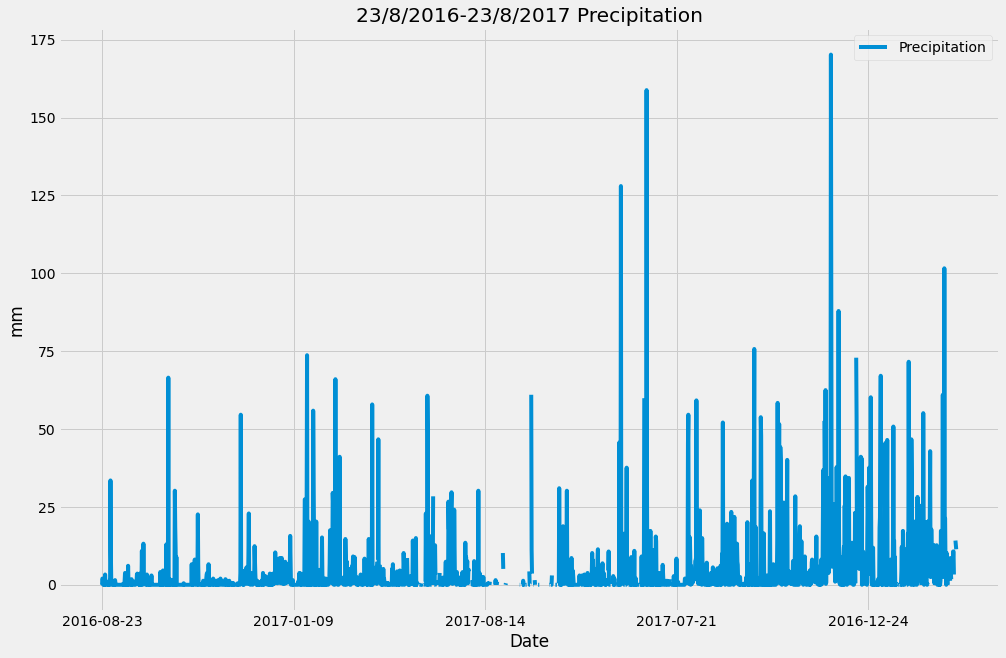

In [136]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_date_df.plot(figsize=(15,10))
plt.xlabel("Date")
plt.ylabel("mm")
plt.title("23/8/2016-23/8/2017 Precipitation")
plt.show()


In [137]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_date_df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [138]:
# Design a query to calculate the total number stations in the dataset
total_number_of_stations = session.query(Station.station).count()
total_number_of_stations
print("The total number of stations in the dataset is {}".format(total_number_of_stations))

The total number of stations in the dataset is 9


In [160]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station, func.count(Measurement.station), Measurement.date]
active_stations=session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772, '2010-01-01'),
 ('USC00519397', 2724, '2010-01-01'),
 ('USC00513117', 2709, '2010-01-01'),
 ('USC00519523', 2669, '2010-01-01'),
 ('USC00516128', 2612, '2010-01-01'),
 ('USC00514830', 2202, '2010-03-01'),
 ('USC00511918', 1979, '2010-01-01'),
 ('USC00517948', 1372, '2010-05-03'),
 ('USC00518838', 511, '2010-01-01')]

In [161]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == active_stations[0][0]).all()

[(12.2, 29.4, 22.03582251082252)]

In [157]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station =  session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == active_stations[0][0]).filter(Measurement.date > one_year_ago_date).all()
most_active_station

[('2016-08-24', 25.0),
 ('2016-08-25', 26.7),
 ('2016-08-26', 26.7),
 ('2016-08-27', 23.9),
 ('2016-08-28', 22.8),
 ('2016-08-29', 25.6),
 ('2016-08-30', 25.0),
 ('2016-08-31', 25.6),
 ('2016-09-01', 26.7),
 ('2016-09-02', 26.7),
 ('2016-09-03', 25.6),
 ('2016-09-04', 25.6),
 ('2016-09-05', 25.6),
 ('2016-09-06', 22.8),
 ('2016-09-07', 23.3),
 ('2016-09-08', 26.7),
 ('2016-09-09', 26.1),
 ('2016-09-10', 25.0),
 ('2016-09-11', 26.7),
 ('2016-09-12', 24.4),
 ('2016-09-13', 26.1),
 ('2016-09-14', 23.9),
 ('2016-09-15', 26.1),
 ('2016-09-16', 25.6),
 ('2016-09-17', 26.1),
 ('2016-09-18', 25.6),
 ('2016-09-19', 25.6),
 ('2016-09-20', 24.4),
 ('2016-09-21', 23.3),
 ('2016-09-22', 25.0),
 ('2016-09-23', 25.6),
 ('2016-09-24', 26.1),
 ('2016-09-25', 26.1),
 ('2016-09-26', 25.0),
 ('2016-09-27', 26.7),
 ('2016-09-28', 25.6),
 ('2016-09-29', 25.6),
 ('2016-09-30', 25.6),
 ('2016-10-01', 25.0),
 ('2016-10-02', 26.1),
 ('2016-10-03', 26.1),
 ('2016-10-04', 26.1),
 ('2016-10-05', 26.1),
 ('2016-10-

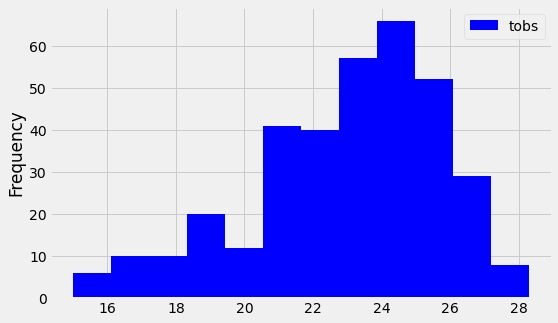

In [154]:
most_active_station_df = pd.DataFrame(most_active_station)
most_active_station_df.plot(kind="hist", bins=12,figsize=(8,5), color='b')

# Close session

In [119]:
# Close Session
session.close()